In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from s_dbw import S_Dbw
import math

In [21]:
# resets index after selections have been made
def resetindex(data):
    data=data.reset_index()
    data=data.drop('index', axis=1)
    return data

In [22]:
#reduces the data set to the first m iterations
def firstiterations(m,data):
    i=0
    j=0
    n=len(data.index)    
    while i<n:
        if  (data.iat[j,10]>m):
            data=data.drop(i, axis=0)
            i=i+1
        else:
            i=i+1
            j=j+1
    data=resetindex(data)
    return data

In [23]:
# Generate a Series with a specific length, so that all residuals of one parameter combination are in one line
def GenerateSeries(source, Length):
    output=source.iloc[:,[4,5]]
    output=output.drop_duplicates()
    output=resetindex(output)
    for j in range(1, Length+1):
        output[f'ResidualNorm{j}']=0.0
        for i in range(len(output.index)):
            Abfrage=source.query( f"`Droptol`=={output.iat[i,0]} and `Fillfactor`=={output.iat[i,1]} and Iterations=={j}")
            if len(Abfrage.index)==1:
                output.iat[i,j+1]=Abfrage.iat[0,8]
            elif len(Abfrage.index)>1:
                raise Exception("Multiple instances with same Droptol, Fillfactor and Iteration within one Beta")
    return output

In [37]:
beta=1e6
numberofpoints=25

In [38]:
df=pd.read_csv(f'BayesOpt1e{int(math.log10(beta))}ExpectedImprovement.txt', sep='\t')
df

,Droptol,Fillfactor
0,1.000000e-04,9.0
1,1.000000e+00,3.0
2,1.000000e-08,6.0
3,1.000000e-10,4.0
4,1.000000e-02,4.0
5,1.000000e-12,8.0
6,1.000000e+02,3.0
7,1.000000e-02,9.0
8,1.000000e+02,1.0
9,1.000000e-06,8.0


In [39]:
dfbeta=pd.read_csv('PCGDim16129.txt', sep='\t')
dfbeta=dfbeta.drop('Convergence Mode', axis=1)

dfBeta=dfbeta.query(f"Beta=={beta}")
dfBeta=resetindex(dfBeta)

In [40]:
dfBeta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22966 entries, 0 to 22965
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ILUTNonzeros         22966 non-null  int64  
 1   Number of unknowns   22966 non-null  int64  
 2   Alpha                22966 non-null  int64  
 3   Beta                 22966 non-null  float64
 4   Droptol              22966 non-null  float64
 5   Fillfactor           22966 non-null  int64  
 6   Tolerance            22966 non-null  float64
 7   InitialResidualNorm  22966 non-null  float64
 8   ResidualNorm         22966 non-null  float64
 9   ResidualQuotient     22966 non-null  float64
 10  Iterations           22966 non-null  int64  
 11  SolutionTime         22966 non-null  float64
 12  ILUAssemblyTime      22966 non-null  float64
 13  AbsoluteError        22966 non-null  float64
 14  RelativeError        22966 non-null  float64
dtypes: float64(10), int64(5)
memory usag

In [41]:
basis=dfBeta.query(f"Droptol=={df.iat[0,0]} and Fillfactor=={df.iat[0,1]}")
for i in range(1,numberofpoints):
    basis=[basis,dfBeta.query(f"Droptol=={df.iat[i,0]} and Fillfactor=={df.iat[i,1]}")]
    basis = pd.concat(basis)
basis=resetindex(basis)
basis

,ILUTNonzeros,Number of unknowns,Alpha,Beta,Droptol,Fillfactor,Tolerance,InitialResidualNorm,ResidualNorm,ResidualQuotient,Iterations,SolutionTime,ILUAssemblyTime,AbsoluteError,RelativeError
0,76551,16129,1,1000000.0,0.000100,9,1.000000e-14,74524.8,3.895880e-01,5.227640e-06,1,0.001692,0.013493,0.000094,0.000462
1,76551,16129,1,1000000.0,0.000100,9,1.000000e-14,74524.8,2.353470e-08,3.157970e-13,2,0.002644,0.013691,0.000057,0.000280
2,76551,16129,1,1000000.0,0.000100,9,1.000000e-14,74524.8,1.489830e-16,1.999100e-21,3,0.003069,0.013578,0.000057,0.000280
3,16129,16129,1,1000000.0,1.000000,3,1.000000e-14,74524.8,9.321650e+05,1.250810e+01,1,0.000912,0.009567,0.201276,0.990656
4,16129,16129,1,1000000.0,1.000000,3,1.000000e-14,74524.8,8.770640e+05,1.176880e+01,2,0.001257,0.009149,0.199391,0.981377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1537,76505,16129,1,1000000.0,0.000100,5,1.000000e-14,74524.8,1.300140e-15,1.744570e-20,6,0.004650,0.010633,0.000057,0.000280
1538,78624,16129,1,1000000.0,0.000001,6,1.000000e-14,74524.8,4.167020e-01,5.591450e-06,1,0.001169,0.009589,0.000100,0.000490
1539,78624,16129,1,1000000.0,0.000001,6,1.000000e-14,74524.8,2.476600e-08,3.323190e-13,2,0.001701,0.009683,0.000057,0.000280
1540,78624,16129,1,1000000.0,0.000001,6,1.000000e-14,74524.8,3.375490e-14,4.529350e-19,3,0.002341,0.009637,0.000057,0.000280


In [42]:
for rounds in range(1,2):    
    print(rounds)

    #test different combinations and compute S_Dbw score
    if rounds<3:
        clustermax=8
    else: clustermax=12
        
    optimizationgrid=np.zeros([7,clustermax-2])
    for SeriesLength in range(3,10):
        for clustercount in range(2,clustermax):
            series=GenerateSeries(basis,SeriesLength)
            scaler = preprocessing.StandardScaler().fit(series.iloc[:,2:(2+SeriesLength)])
            scaled_clusterdata=scaler.transform(series.iloc[:,2:(2+SeriesLength)])
            kmeans=KMeans(n_clusters=clustercount)
            y=kmeans.fit_predict(scaled_clusterdata)
            UnsortedClusters=y
            labels=kmeans.labels_
            score = S_Dbw(scaled_clusterdata, labels, centers_id=None, method='Halkidi', alg_noise='bind', centr='mean', nearest_centr=True, metric='euclidean')
            optimizationgrid[SeriesLength-3,clustercount-2]= score
        
    # take best option based on the score      
    minima=np.argwhere((optimizationgrid == np.min(optimizationgrid)))
    minima=minima[0]
    SeriesLength=minima[0]+3
    clustercount=minima[1]+2


    series=GenerateSeries(basis,SeriesLength)
    scaler = preprocessing.StandardScaler().fit(series.iloc[:,2:(2+SeriesLength)])
    scaled_clusterdata=scaler.transform(series.iloc[:,2:(2+SeriesLength)])
    kmeans=KMeans(n_clusters=clustercount)
    y=kmeans.fit_predict(scaled_clusterdata)
    UnsortedClusters=y
    labels=kmeans.labels_
    score = S_Dbw(scaled_clusterdata, labels, centers_id=None, method='Halkidi', alg_noise='bind',\
                  centr='mean', nearest_centr=True, metric='euclidean')



    #Take best combination and sort clusters
    SortingValues=np.zeros(clustercount)
    SortData=pd.DataFrame(series[f'ResidualNorm{SeriesLength}'])
    SortData['UnsortedClusters']=y
    for i in range(0,clustercount):
        ResOfCluster=SortData.query(f'UnsortedClusters=={i}')
        sums=ResOfCluster[f"ResidualNorm{SeriesLength}"].sum()
        SortingValues[i]=sums/len(ResOfCluster.index)
    
    Sorting=np.argsort(np.argsort(SortingValues))
    Clusters=np.zeros(shape=len(UnsortedClusters))
    for i in range(0,len(Clusters)):
        Clusters[i]=Sorting[UnsortedClusters[i]]
    Clusters=np.int_(Clusters)
    series['Cluster']=Clusters


    Droptols=basis["Droptol"].unique()
    Droptols=np.sort(Droptols)
    minDroptol=Droptols[0]
    maxDroptol=Droptols[len(Droptols)-1]

    Fillfactors=basis["Fillfactor"].unique()
    Fillfactors=np.sort(Fillfactors)
    minFillfactor=Fillfactors[0]
    maxFillfactor=Fillfactors[len(Fillfactors)-1]
    
    
    tobedetermined=pd.DataFrame(columns=["Droptol","Fillfactor"])
    tobedetermined["Droptol"]=tobedetermined["Droptol"].astype(float)
    tobedetermined["Fillfactor"]=tobedetermined["Fillfactor"].astype(int)
    
    
    #vertical axis
    for i in range(0,len(Droptols)):
    
        #left and right boundary
        if (Droptols[i]==minDroptol or Droptols[i]==maxDroptol):
            
            #which points exist for a certain Droptol, sorted ascending by Fillfactor
            temp=(series.query(f"Droptol=={Droptols[i]}")).sort_values(by=["Fillfactor"])
            temp=resetindex(temp)
            for j in range(0,len(temp.index)-1):
                #comparison of pairs of direct point
                if temp.iat[j,SeriesLength+2]!=temp.iat[j+1,SeriesLength+2]:
                    tobedetermined=tobedetermined.append({'Droptol':temp.iat[j,0],'Fillfactor':math.floor((temp.iat[j,1]+temp.iat[j+1,1])/2)}, ignore_index=True)
                
        else:
            temp=(series.query(f"Droptol=={Droptols[i]}")).sort_values(by="Fillfactor")
            temp=resetindex(temp)
            curDroptol=Droptols[i]

        
            #look at points "above"
            for j in range(0,len(temp.index)):
            
                curFillfactor=temp.iat[j,1]
            
                if curFillfactor==maxFillfactor:
                    break
                
                optFillfactors=Fillfactors
                mask=(optFillfactors)>curFillfactor
                optFillfactors=optFillfactors[mask]
                optFillfactors=sorted(optFillfactors)
                
                for k in range(0,len(optFillfactors)):
                
                    if (series.query(f"Droptol=={curDroptol} and Fillfactor=={optFillfactors[k]}")).empty:
                        above=(series.query(f"Droptol>{curDroptol} and Fillfactor=={optFillfactors[k]}")).sort_values(by=["Droptol"])                    
                        under=(series.query(f"Droptol<{curDroptol} and Fillfactor=={optFillfactors[k]}")).sort_values(by=["Droptol"], ascending=False)
                        if (np.invert(above.empty) and np.invert(under.empty)):
                            above=resetindex(above)
                            under=resetindex(under)
                        
                            if (above.iat[0,SeriesLength+2]==under.iat[0,SeriesLength+2]):
                                if (above.iat[0,SeriesLength+2]!=temp.iat[j,SeriesLength+2]):
                                    if (math.floor((curFillfactor+optFillfactors[k])/2)!=minFillfactor):
                                        tobedetermined=tobedetermined.append({'Droptol':curDroptol,'Fillfactor':math.floor((curFillfactor+optFillfactors[k])/2)}, ignore_index=True)
                                break
                            
                    else:
                        if k<len(optFillfactors):
                            if temp.iat[j,SeriesLength+2]!=temp.iat[j+1,SeriesLength+2]:
                                if (math.floor((temp.iat[j,1]+temp.iat[j+1,1])/2)!=minFillfactor):
                                    tobedetermined=tobedetermined.append({'Droptol':temp.iat[j,0],'Fillfactor':math.floor((temp.iat[j,1]+temp.iat[j+1,1])/2)}, ignore_index=True)
                                break
                            elif temp.iat[j,SeriesLength+2]==temp.iat[j+1,SeriesLength+2]:
                                break
        
            #look at points "under"
            for j in range(0,len(temp.index)):
                
                curFillfactor=temp.iat[j,1]

                if curFillfactor==minFillfactor:
                    break
                
                optFillfactors=Fillfactors
                mask=(optFillfactors)<curFillfactor
                optFillfactors=optFillfactors[mask]
                optFillfactors=sorted(optFillfactors, reverse=True)

                for k in range(0,len(optFillfactors)):
                    
                    if (series.query(f"Droptol=={curDroptol} and Fillfactor=={optFillfactors[k]}")).empty:
                        above=(series.query(f"Droptol>{curDroptol} and Fillfactor=={optFillfactors[k]}")).sort_values(by=["Droptol"])                    
                        under=(series.query(f"Droptol<{curDroptol} and Fillfactor=={optFillfactors[k]}")).sort_values(by=["Droptol"], ascending=False)
                        if (np.invert(above.empty) and np.invert(under.empty)):
                            above=resetindex(above)
                            under=resetindex(under)
                        
                            if (above.iat[0,SeriesLength+2]==under.iat[0,SeriesLength+2]):
                                if (above.iat[0,SeriesLength+2]!=temp.iat[j,SeriesLength+2]):
                                    if (math.floor((curFillfactor+optFillfactors[k])/2)!=minFillfactor):
                                        tobedetermined=tobedetermined.append({'Droptol':curDroptol,'Fillfactor':math.floor((curFillfactor+optFillfactors[k])/2)}, ignore_index=True)
                                break
                    else:
                        if k<len(optFillfactors):
                            if temp.iat[j,SeriesLength+2]!=temp.iat[j-1,SeriesLength+2]:
                                if (math.floor((temp.iat[j,1]+temp.iat[j-1,1])/2)!=minFillfactor):
                                    tobedetermined=tobedetermined.append({'Droptol':temp.iat[j,0],'Fillfactor':math.floor((temp.iat[j,1]+temp.iat[j-1,1])/2)}, ignore_index=True)
                                break
                            elif temp.iat[j,SeriesLength+2]==temp.iat[j-1,SeriesLength+2]:
                                break
                        
    
    
    
    
    
    
    #horizontal axis
    for i in range(0,len(Fillfactors)):
    
        #upper and lower boundary
        if (Fillfactors[i]==minFillfactor or Fillfactors[i]==maxFillfactor):
            #which points exist for a certain Fillfactor, sorted ascending by Droptol
            temp=(series.query(f"Fillfactor=={Fillfactors[i]}")).sort_values(by=["Droptol"])
            temp=resetindex(temp)
            for j in range(0,len(temp.index)-1):
                #comparison of pairs of direct point
                if temp.iat[j,SeriesLength+2]!=temp.iat[j+1,SeriesLength+2]:
                    tobedetermined=tobedetermined.append({'Droptol':10**(math.floor((math.log10(temp.iat[j,0])+math.log10(temp.iat[j+1,0]))/4)*2),'Fillfactor':temp.iat[j,1]}, ignore_index=True)
            
        else:
            temp=(series.query(f"Fillfactor=={Fillfactors[i]}")).sort_values(by="Droptol")
            temp=resetindex(temp)
            curFillfactor=Fillfactors[i]
        
            #look at points "to the right"
            for j in range(0,len(temp.index)):
            
                curDroptol=temp.iat[j,0]

                if curDroptol==maxDroptol:
                    break
                
                optDroptols=Droptols
                mask=(optDroptols)>curDroptol
                optDroptols=optDroptols[mask]
                optDroptols=sorted(optDroptols)
            
                for k in range(0,len(optDroptols)):

                    if (series.query(f"Droptol=={optDroptols[k]} and Fillfactor=={curFillfactor}")).empty:
                        above=(series.query(f"Droptol=={optDroptols[k]} and Fillfactor>{curFillfactor}")).sort_values(by=["Fillfactor"])                    
                        under=(series.query(f"Droptol=={optDroptols[k]} and Fillfactor<{curFillfactor}")).sort_values(by=["Fillfactor"], ascending=False)

                        if (np.invert(above.empty) and np.invert(under.empty)):
                            above=resetindex(above)
                            under=resetindex(under)
                        
                            if (above.iat[0,SeriesLength+2]==under.iat[0,SeriesLength+2]):
                                if (above.iat[0,SeriesLength+2]!=temp.iat[j,SeriesLength+2]):
                                    if (10**(math.floor((math.log10(curDroptol)+math.log10(optDroptols[k]))/4)*2)!=minDroptol):
                                        tobedetermined=tobedetermined.append({'Droptol':10**(math.floor((math.log10(curDroptol)+math.log10(optDroptols[k]))/4)*2),'Fillfactor':curFillfactor}, ignore_index=True)
                                break
                    else:
                        if k<len(optDroptols):
                            if temp.iat[j,SeriesLength+2]!=temp.iat[j+1,SeriesLength+2]:
                                if (10**(math.floor((math.log10(temp.iat[j,0])+math.log10(temp.iat[j+1,0]))/4)*2)!=minDroptol):
                                    tobedetermined=tobedetermined.append({'Droptol':10**(math.floor((math.log10(temp.iat[j,0])+math.log10(temp.iat[j+1,0]))/4)*2),'Fillfactor':temp.iat[j,1]}, ignore_index=True)
                                break
                            elif temp.iat[j,SeriesLength+2]==temp.iat[j+1,SeriesLength+2]:
                                break
        
        
            #look at points "to the left"
            for j in range(0,len(temp.index)):
                
                curDroptol=temp.iat[j,0]

                if curDroptol==minDroptol:
                    break
                
                optDroptols=Droptols
                mask=(optDroptols)<curDroptol
                optDroptols=optDroptols[mask]
                optDroptols=sorted(optDroptols, reverse=True)
            
                for k in range(0,len(optDroptols)):

                    if (series.query(f"Droptol=={optDroptols[k]} and Fillfactor=={curFillfactor}")).empty:
                        above=(series.query(f"Droptol=={optDroptols[k]} and Fillfactor>{curFillfactor}")).sort_values(by=["Fillfactor"])                    
                        under=(series.query(f"Droptol=={optDroptols[k]} and Fillfactor<{curFillfactor}")).sort_values(by=["Fillfactor"], ascending=False)
                    
                        if (np.invert(above.empty) and np.invert(under.empty)):
                            above=resetindex(above)
                            under=resetindex(under)
                        
                            if (above.iat[0,SeriesLength+2]==under.iat[0,SeriesLength+2]):
                                if (above.iat[0,SeriesLength+2]!=temp.iat[j,SeriesLength+2]):
                                    if (10**(math.floor((math.log10(curDroptol) + math.log10(optDroptols[k]))/4)*2)!=minDroptol):
                                        tobedetermined=tobedetermined.append({'Droptol':10**(math.floor((math.log10(curDroptol) + math.log10(optDroptols[k]))/4)*2) ,'Fillfactor': curFillfactor}, ignore_index=True)
                                break
                    else:
                        if k<len(optDroptols):
                            if temp.iat[j,SeriesLength+2]!=temp.iat[j-1,SeriesLength+2]:
                                if (10**(math.floor((math.log10(temp.iat[j,0])+math.log10(temp.iat[j-1,0]))/4)*2)!=minDroptol):
                                    tobedetermined=tobedetermined.append({'Droptol':10**(math.floor((math.log10(temp.iat[j,0])+math.log10(temp.iat[j-1,0]))/4)*2) ,'Fillfactor':temp.iat[j,1]}, ignore_index=True)
                                break
                            elif temp.iat[j,SeriesLength+2]==temp.iat[j-1,SeriesLength+2]:
                                break
                                
                                
    tobedetermined=tobedetermined.drop_duplicates()
    tobedetermined=resetindex(tobedetermined)                            
                                
    points=basis[["Droptol","Fillfactor"]]
    points = points.drop_duplicates()
    points = resetindex(points)

    NumberOldPoints=len(points.index)

    points=[points,tobedetermined]
    points = pd.concat(points)
    points = points.drop_duplicates()
    points = resetindex(points)
    NumberNewPoints=len(points.index)

    #if NumberOldPoints==NumberNewPoints:
    #    break
    #else:        
    #    if len(points.index)>0:
    #        basis=dfBeta.query(f"Droptol=={points.iat[0,0]} and Fillfactor=={points.iat[0,1]}")
    #        j=1
   # 
   #         while j<len(points.index):
   #             basisadd=dfBeta.query(f"Droptol=={points.iat[j,0]} and Fillfactor=={points.iat[j,1]}")
   #             basis=[basis,basisadd]
   #             basis=pd.concat(basis)
   #             j=j+1
   # 
   #         basis=resetindex(basis)
                        
    
    

1


In [45]:
#Generate final provenance data, includig Droptol, Fillfactor, ILUTNonzeros, Time, and Cluster
series['ILUTNonzeros']=''
series['TimeAtSeriesLengthIteration']=''
lengthBasis=len(series.index)
for i in range(0,lengthBasis):
    #print('i=',i)
    #print(basis.query(f"Droptol=={series.iat[i,0]} and Fillfactor=={series.iat[i,1]}"))
    series.iat[i,3+SeriesLength]=(basis.query(f"Droptol=={series.iat[i,0]} and Fillfactor=={series.iat[i,1]}")).iat[0,0]
    series.iat[i,4+SeriesLength]=((basis.query(f"Droptol=={series.iat[i,0]} and Fillfactor=={series.iat[i,1]} and Iterations<(1+{SeriesLength})")).sort_values(by=['Iterations'],ascending=False)).iat[0,11] + ((basis.query(f"Droptol=={series.iat[i,0]} and Fillfactor=={series.iat[i,1]} and Iterations<(1+{SeriesLength})")).sort_values(by=['Iterations'],ascending=False)).iat[0,12]
    
ProvenanceData=series[['Droptol','Fillfactor','ILUTNonzeros','TimeAtSeriesLengthIteration','Cluster']]
#ProvenanceData

In [1]:
#Filter and sort provenance data according to constraints and optimization goals
ILUTNonzerosLimit=1000000
ProvenanceData
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print((ProvenanceData.query("Cluster==0")).sort_values(by=['TimeAtSeriesLengthIteration']))
#    print(resetindex((ProvenanceData.query("Cluster==0")).sort_values(by=['TimeAtSeriesLengthIteration'])))
    #print(resetindex((ProvenanceData.query("Cluster<3")).sort_values(by=['ILUTNonzeros','TimeAtSeriesLengthIteration'])))
    #print(resetindex((ProvenanceData.query(f"ILUTNonzeros<{ILUTNonzerosLimit}")).sort_values(by=['Cluster','ILUTNonzeros','TimeAtSeriesLengthIteration'])))
    #print(resetindex((ProvenanceData.query(f"ILUTNonzeros<{ILUTNonzerosLimit}")).sort_values(by=['Cluster','TimeAtSeriesLengthIteration'])))

NameError: name 'ProvenanceData' is not defined

<br>
<br>
<br>
<strong> Visualizing parameter space

In [47]:
list=['0','1','2','3','4','5','6','7','8','9','10','11']
for cl in range(0,clustercount):
    vars()["PredictionGroup"+list[cl]]=ProvenanceData.query(f"`Cluster`=={cl} and ILUTNonzeros<{ILUTNonzerosLimit}")

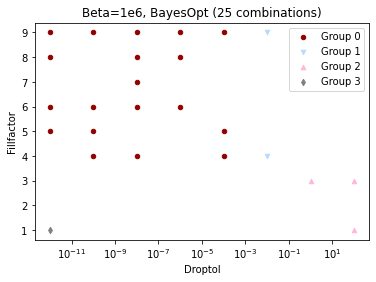

In [52]:
ax = PredictionGroup0.plot(kind='scatter', x='Droptol', y='Fillfactor',color='#920000', label='Group 0');
PredictionGroup1.plot(kind='scatter', x='Droptol', y='Fillfactor',marker= "v", color='#b6dbff', label='Group 1', ax=ax);
if clustercount>2:
    PredictionGroup2.plot(kind='scatter', x='Droptol', y='Fillfactor',marker= "^", color='#ffb6db', label='Group 2', ax=ax);
    if clustercount>3:
        PredictionGroup3.plot(kind='scatter', x='Droptol', y='Fillfactor',marker= "d",color='grey', label='Group 3', ax=ax);
        if clustercount>4:
            PredictionGroup4.plot(kind='scatter', x='Droptol', y='Fillfactor',marker= "<",color='#24ff24', label='Group 4', ax=ax);
            if clustercount>5:
                PredictionGroup5.plot(kind='scatter', x='Droptol', y='Fillfactor',marker= ">",color='#490092', label='Group 5', ax=ax);
                if clustercount>6:
                    PredictionGroup6.plot(kind='scatter', x='Droptol', y='Fillfactor',marker= "s",color='#db6d00', label='Group 6', ax=ax);
                    if clustercount>7:
                        PredictionGroup7.plot(kind='scatter', x='Droptol', y='Fillfactor',marker= "*",color='#b66dff', label='Group 7', ax=ax);
                        if clustercount>8:
                            PredictionGroup8.plot(kind='scatter', x='Droptol', y='Fillfactor',marker= "+",color='#009292', label='Group 8', ax=ax);
                            if clustercount>9:
                                PredictionGroup9.plot(kind='scatter', x='Droptol', y='Fillfactor',marker= "x", color='#924900', label='Group 9', ax=ax);
                                if clustercount>10:
                                    PredictionGroup10.plot(kind='scatter', x='Droptol', y='Fillfactor',marker= "X",color='#006ddb', label='Group 10', ax=ax);
                                    if clustercount>11:
                                        PredictionGroup11.plot(kind='scatter', x='Droptol', y='Fillfactor',marker= "D",color='#004949', label='Group 11', ax=ax);
#tobedetermined.plot(kind='scatter', x='Droptol', y='Fillfactor',marker='o', color='none', edgecolors='black', label='tobedetermined', ax=ax);
ax.set_xscale('log')
ax.legend(bbox_to_anchor=(1.0, 1.0))
#plt.title(f"Beta=1e{int(math.log10(beta))}, BayesOpt ({numberofpoints} combinations), ILUTNonzeros<{ILUTNonzerosLimit}")
plt.title(f"Beta=1e{int(math.log10(beta))}, BayesOpt ({numberofpoints} combinations)")
plt.show()

<br>
<br>
<br>
<strong> Visualizing trajectories

In [36]:
basis['Cluster']=0

for i in range(len(basis.index)):
    basis.iat[i,15]=(series.query(f"`Droptol`=={basis.iat[i,4]} and `Fillfactor`=={basis.iat[i,5]}")).iat[0,SeriesLength+2]
    
    
list=['0','1','2','3','4','5','6','7','8','9','10','11']
for cl in range(0,clustercount):
    vars()["Group"+list[cl]]=basis.query(f"`Cluster`=={cl} and ILUTNonzeros<{ILUTNonzerosLimit}")


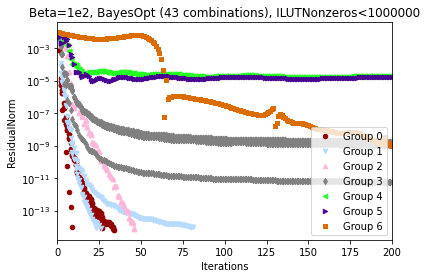

In [123]:
ax = Group0.plot(kind='scatter', x='Iterations', y='ResidualNorm',color='#920000', label='Group 0');
Group1.plot(kind='scatter', x='Iterations', y='ResidualNorm',marker= "v",color='#b6dbff', label='Group 1',ax=ax);
if clustercount>2:
    Group2.plot(kind='scatter', x='Iterations', y='ResidualNorm',marker= "^",color='#ffb6db', label='Group 2',ax=ax);
    if clustercount>3:
        Group3.plot(kind='scatter', x='Iterations', y='ResidualNorm',marker= "d",color='grey', label='Group 3',ax=ax);
        if clustercount>4:
            Group4.plot(kind='scatter', x='Iterations', y='ResidualNorm',marker= "<",color='#24ff24', label='Group 4',ax=ax);
            if clustercount>5:
                Group5.plot(kind='scatter', x='Iterations', y='ResidualNorm',marker= ">",color='#490092', label='Group 5', ax=ax);
                if clustercount>6:
                    Group6.plot(kind='scatter', x='Iterations', y='ResidualNorm',marker= "s",color='#db6d00', label='Group 6', ax=ax);
                    if clustercount>7:
                        Group7.plot(kind='scatter', x='Iterations', y='ResidualNorm',marker= "*",color='#b66dff', label='Group 7', ax=ax);
                        if clustercount>8:
                            Group8.plot(kind='scatter', x='Iterations', y='ResidualNorm',marker= "+",color='#009292', label='Group 8', ax=ax);
                            if clustercount>9:
                                Group9.plot(kind='scatter', x='Iterations', y='ResidualNorm',marker= "x",color='#924900', label='Group 9', ax=ax);
                                if clustercount>10:
                                    Group10.plot(kind='scatter', x='Iterations', y='ResidualNorm',marker= "X",color='#006ddb', label='Group 10', ax=ax);
                                    if clustercount>11:
                                        Group11.plot(kind='scatter', x='Iterations', y='ResidualNorm',marker= "D",color='#004949', label='Group 11', ax=ax);
                                                            
ax.set_yscale('log')
ax.set_xlim(0,200)
plt.legend(loc='lower right')
plt.title(f"Beta=1e{int(math.log10(beta))}, BayesOpt ({numberofpoints} combinations), ILUTNonzeros<{ILUTNonzerosLimit}")
#plt.title(f"Beta=1e{int(math.log10(beta))}, BayesOpt ({numberofpoints} combinations)")
plt.show()    